In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import sklearn.decomposition as decomp

In [2]:
with h5py.File('hw4_data1.mat', 'r') as file:
    keys = list(file.keys())
    print(keys)
    faces = np.asarray(file['faces'])
print(faces.shape)

['faces']
(1024, 1000)


## Part A

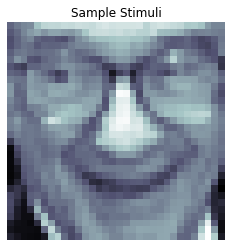

In [23]:
plt.imshow(faces[:,0].reshape((32,32)).T, cmap='bone')
plt.axis('off')
plt.title('Sample Stimuli')
plt.show()

In [3]:
pca_data = decomp.PCA(100, whiten=True)
pca_data.fit(faces.T)

PCA(copy=True, iterated_power='auto', n_components=100, random_state=None,
    svd_solver='auto', tol=0.0, whiten=True)

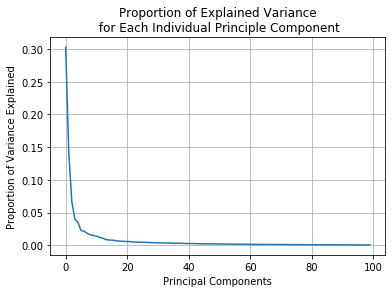

In [4]:
plt.plot(pca_data.explained_variance_ratio_)
plt.xlabel('Principal Components')
plt.ylabel('Proportion of Variance Explained')
plt.title('Proportion of Explained Variance\n for Each Individual Principle Component')
plt.grid()
plt.show()

First 25 Principal Components


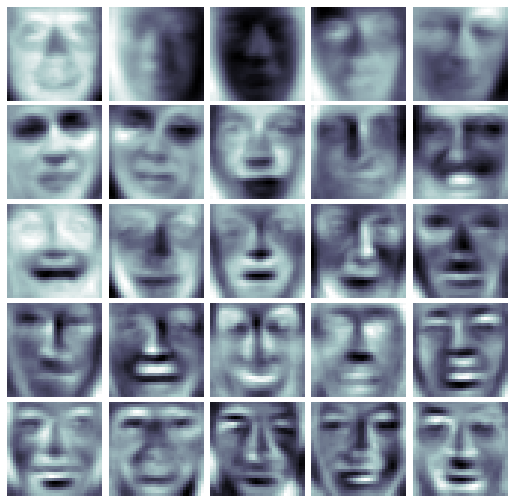

In [5]:
print('First 25 Principal Components')
plt.figure(figsize=(9,9))
for i in range(1,26):
    plt.subplot(5,5,i)
    plt.imshow(pca_data.components_[i-1].reshape((32,32)).T, cmap='bone')
    plt.axis('off')
plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.show()

## Part B

In [6]:
faces_rec10 = (faces - pca_data.mean_.reshape(1024,1)).T.dot(pca_data.components_[0:10].T).dot(pca_data.components_[0:10]) + pca_data.mean_
faces_rec25 = (faces - pca_data.mean_.reshape(1024,1)).T.dot(pca_data.components_[0:25].T).dot(pca_data.components_[0:25]) + pca_data.mean_
faces_rec50 = (faces - pca_data.mean_.reshape(1024,1)).T.dot(pca_data.components_[0:50].T).dot(pca_data.components_[0:50]) + pca_data.mean_

Original Images


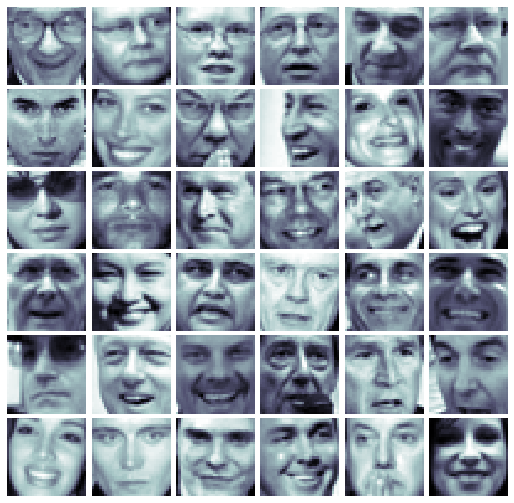

Reconstructed Images with 10 PCs


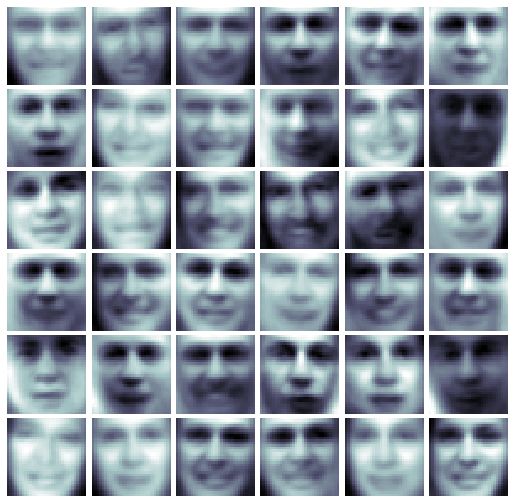

Reconstructed Images with 25 PCs


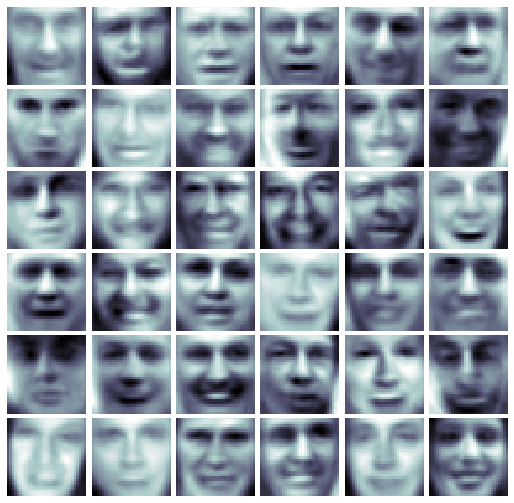

Reconstructed Images with 50 PCs


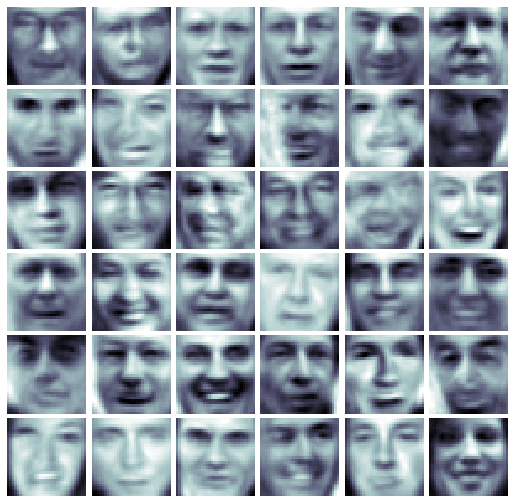

In [7]:
print('Original Images')
plt.figure(figsize=(9,9))
for i in range(1,37):
    plt.subplot(6,6,i)
    plt.imshow(faces.T[i-1].reshape((32,32)).T, cmap='bone')
    plt.axis('off')
plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.show()
print('Reconstructed Images with 10 PCs')
plt.figure(figsize=(9,9))
for i in range(1,37):
    plt.subplot(6,6,i)
    plt.imshow(faces_rec10[i-1].reshape((32,32)).T, cmap='bone')
    plt.axis('off')
plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.show()
print('Reconstructed Images with 25 PCs')
plt.figure(figsize=(9,9))
for i in range(1,37):
    plt.subplot(6,6,i)
    plt.imshow(faces_rec25[i-1].reshape((32,32)).T, cmap='bone')
    plt.axis('off')
plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.show()
print('Reconstructed Images with 50 PCs')
plt.figure(figsize=(9,9))
for i in range(1,37):
    plt.subplot(6,6,i)
    plt.imshow(faces_rec50[i-1].reshape((32,32)).T, cmap='bone')
    plt.axis('off')
plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.show()

In [8]:
mse_10 = np.mean((faces.T- faces_rec10)**2)
std_10 = np.std(np.mean((faces.T - faces_rec10)**2, axis=1))
print('Reconstruction MSE Loss with %d PCs:\nMean: %f\nStd: %f ' % (10, mse_10, std_10))
mse_25 = np.mean((faces.T- faces_rec25)**2)
std_25 = np.std(np.mean((faces.T - faces_rec25)**2, axis=1))
print('Reconstruction MSE Loss with %d PCs:\nMean: %f\nStd: %f ' % (25, mse_25, std_25))
mse_50 = np.mean((faces.T- faces_rec50)**2)
std_50 = np.std(np.mean((faces.T - faces_rec50)**2, axis=1))
print('Reconstruction MSE Loss with %d PCs:\nMean: %f\nStd: %f ' % (50, mse_50, std_50))

Reconstruction MSE Loss with 10 PCs:
Mean: 523.241745
Std: 257.641199 
Reconstruction MSE Loss with 25 PCs:
Mean: 332.256492
Std: 153.110296 
Reconstruction MSE Loss with 50 PCs:
Mean: 198.425229
Std: 84.179787 


## Part C

In [9]:
rng = np.random.seed(10)
ica10 = decomp.FastICA(10, whiten=True, random_state=rng)
ica25 = decomp.FastICA(25, whiten=True, random_state=rng)
ica50 = decomp.FastICA(50, whiten=True, random_state=rng)

In [10]:
ica10.fit(faces.T)
ica25.fit(faces.T)
ica50.fit(faces.T)

FastICA(algorithm='parallel', fun='logcosh', fun_args=None, max_iter=200,
        n_components=50, random_state=None, tol=0.0001, w_init=None,
        whiten=True)

In [11]:
ica10.components_.shape

(10, 1024)

10 ICs


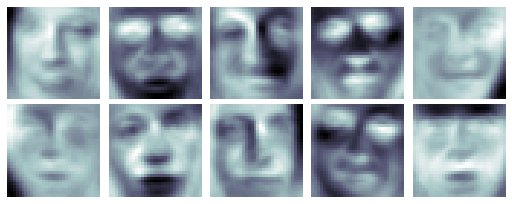

25 ICs


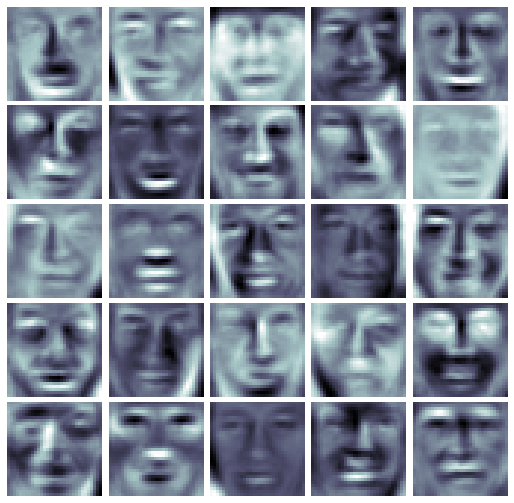

50 ICs


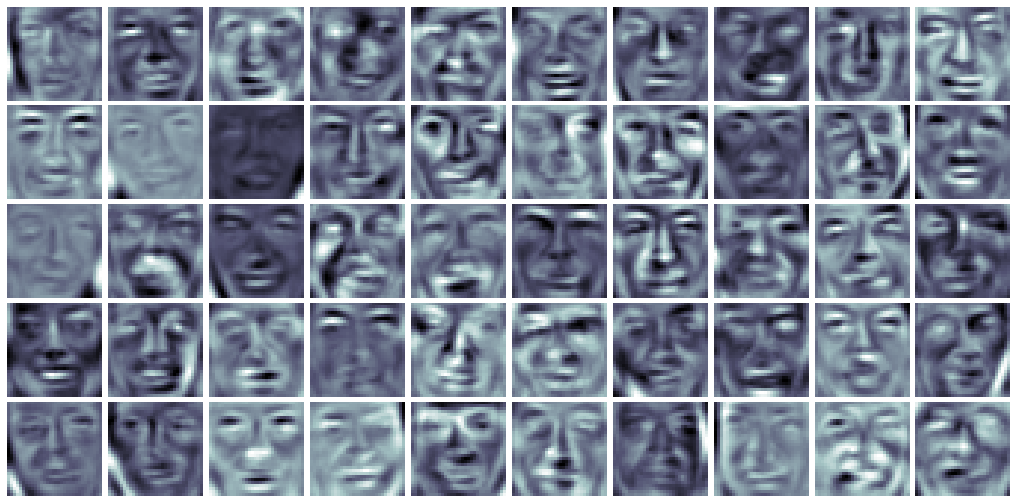

In [12]:
print('10 ICs')
plt.figure(figsize=(9,3.5))
for i in range(1,11):
    plt.subplot(2,5,i)
    plt.imshow(ica10.components_[i-1].reshape((32,32)).T, cmap='bone')
    plt.axis('off')
plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.show()
print('25 ICs')
plt.figure(figsize=(9,9))
for i in range(1,26):
    plt.subplot(5,5,i)
    plt.imshow(ica25.components_[i-1].reshape((32,32)).T, cmap='bone')
    plt.axis('off')
plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.show()
print('50 ICs')
plt.figure(figsize=(18,9))
for i in range(1,51):
    plt.subplot(5,10,i)
    plt.imshow(ica50.components_[i-1].reshape((32,32)).T, cmap='bone')
    plt.axis('off')
plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.show()

In [13]:
faces_ica10 = ica10.fit_transform(faces.T).dot(ica10.mixing_.T) + ica10.mean_
faces_ica25 = ica25.fit_transform(faces.T).dot(ica25.mixing_.T) + ica25.mean_
faces_ica50 = ica50.fit_transform(faces.T).dot(ica50.mixing_.T) + ica50.mean_

Reconstructed Images with 10 ICs


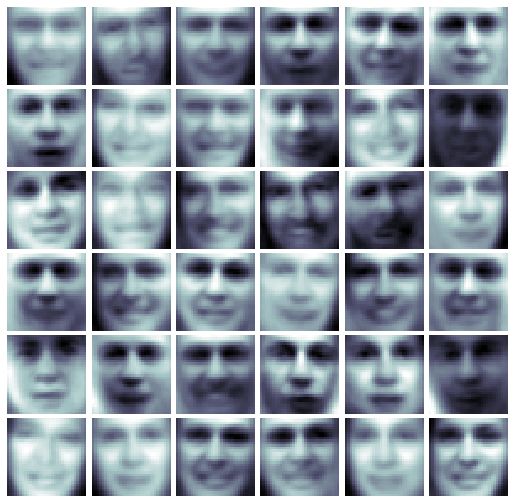

Reconstructed Images with 25 ICs


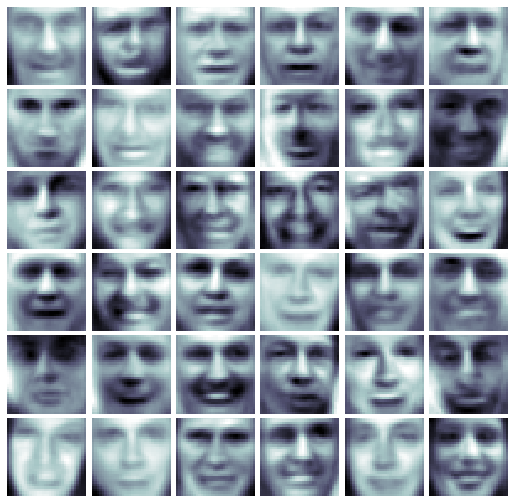

Reconstructed Images with 50 ICs


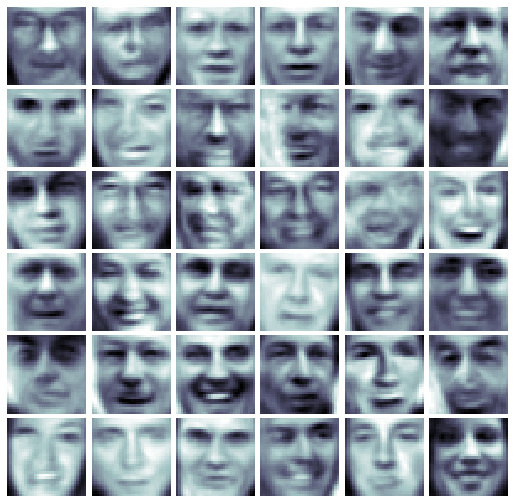

In [14]:
print('Reconstructed Images with 10 ICs')
plt.figure(figsize=(9,9))
for i in range(1,37):
    plt.subplot(6,6,i)
    plt.imshow(faces_ica10[i-1].reshape((32,32)).T, cmap='bone')
    plt.axis('off')
plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.show()
print('Reconstructed Images with 25 ICs')
plt.figure(figsize=(9,9))
for i in range(1,37):
    plt.subplot(6,6,i)
    plt.imshow(faces_ica25[i-1].reshape((32,32)).T, cmap='bone')
    plt.axis('off')
plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.show()
print('Reconstructed Images with 50 ICs')
plt.figure(figsize=(9,9))
for i in range(1,37):
    plt.subplot(6,6,i)
    plt.imshow(faces_ica50[i-1].reshape((32,32)).T, cmap='bone')
    plt.axis('off')
plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.show()

In [24]:
mse_10 = np.mean((faces.T- faces_ica10)**2)
std_10 = np.std(np.mean((faces.T - faces_ica10)**2, axis=1))
print('Reconstruction MSE Loss with %d ICs:\nMean: %f\nStd: %f ' % (10, mse_10, std_10))
mse_25 = np.mean((faces.T- faces_ica25)**2)
std_25 = np.std(np.mean((faces.T - faces_ica25)**2, axis=1))
print('Reconstruction MSE Loss with %d ICs:\nMean: %f\nStd: %f ' % (25, mse_25, std_25))
mse_50 = np.mean((faces.T- faces_ica50)**2)
std_50 = np.std(np.mean((faces.T - faces_ica50)**2, axis=1))
print('Reconstruction MSE Loss with %d ICs:\nMean: %f\nStd: %f ' % (50, mse_50, std_50))

Reconstruction MSE Loss with 10 ICs:
Mean: 523.241745
Std: 257.641200 
Reconstruction MSE Loss with 25 ICs:
Mean: 332.256492
Std: 153.110288 
Reconstruction MSE Loss with 50 ICs:
Mean: 198.425067
Std: 84.179966 


## Part D

In [16]:
faces_nn = faces + np.abs(np.min(faces))
nmf10 = decomp.NMF(n_components=10, solver='mu', max_iter=1000)
nmf25 = decomp.NMF(n_components=25, solver='mu', max_iter=1000)
nmf50 = decomp.NMF(n_components=50, solver='mu', max_iter=1000)

In [17]:
nmf10.fit(faces_nn.T)
nmf25.fit(faces_nn.T)
nmf50.fit(faces_nn.T)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=1000,
    n_components=50, random_state=None, shuffle=False, solver='mu', tol=0.0001,
    verbose=0)

10 MFs


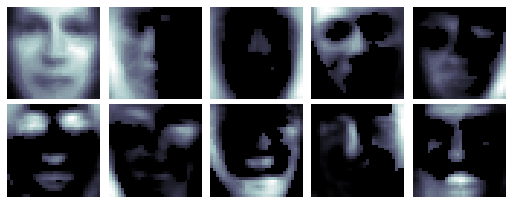

25 MFs


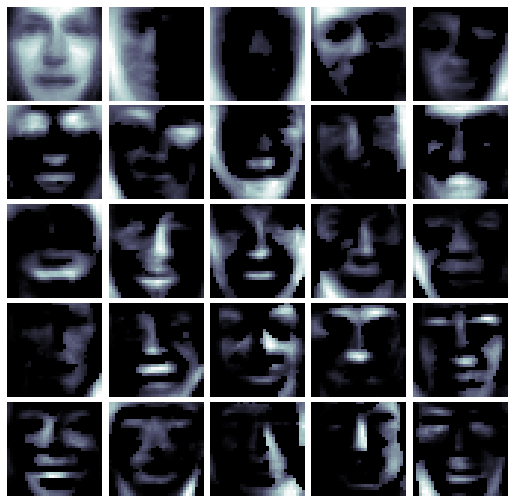

50 MFs


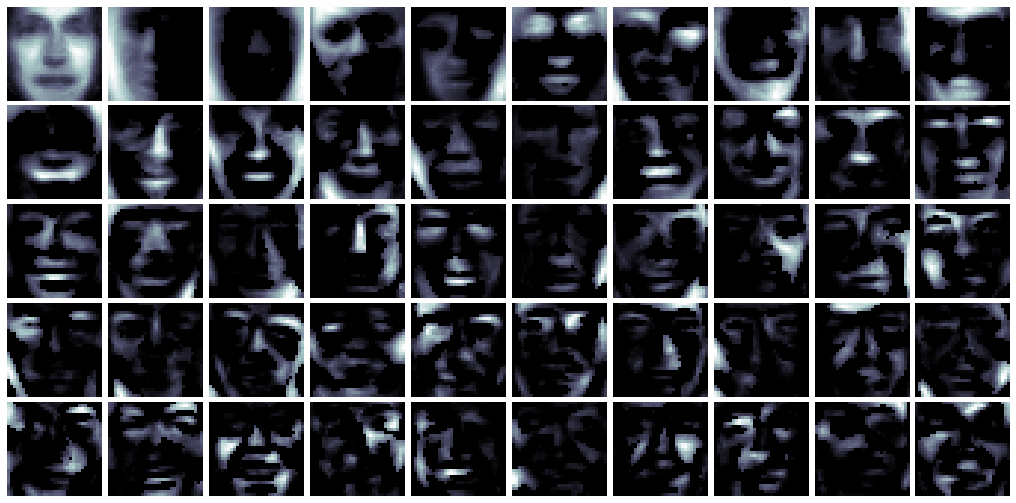

In [18]:
print('10 MFs')
plt.figure(figsize=(9,3.5))
for i in range(1,11):
    plt.subplot(2,5,i)
    plt.imshow(nmf10.components_[i-1].reshape((32,32)).T, cmap='bone')
    plt.axis('off')
plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.show()
print('25 MFs')
plt.figure(figsize=(9,9))
for i in range(1,26):
    plt.subplot(5,5,i)
    plt.imshow(nmf25.components_[i-1].reshape((32,32)).T, cmap='bone')
    plt.axis('off')
plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.show()
print('50 MFs')
plt.figure(figsize=(18,9))
for i in range(1,51):
    plt.subplot(5,10,i)
    plt.imshow(nmf50.components_[i-1].reshape((32,32)).T, cmap='bone')
    plt.axis('off')
plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.show()

In [19]:
faces_nmf10 = nmf10.fit_transform(faces_nn.T).dot(nmf10.components_) - np.abs(np.min(faces))
faces_nmf25 = nmf25.fit_transform(faces_nn.T).dot(nmf25.components_) - np.abs(np.min(faces))
faces_nmf50 = nmf50.fit_transform(faces_nn.T).dot(nmf50.components_) - np.abs(np.min(faces))

Reconstructed Images with 10 MFs


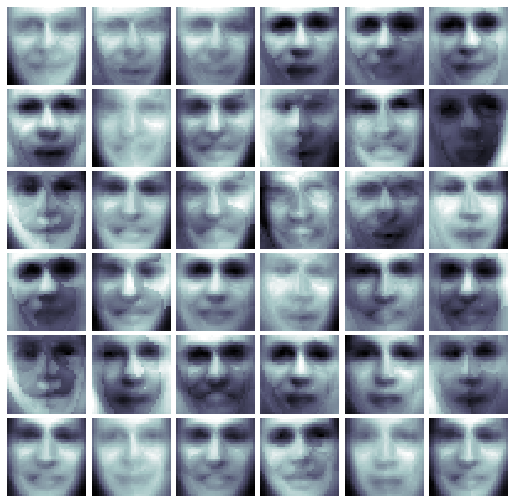

Reconstructed Images with 25 MFs


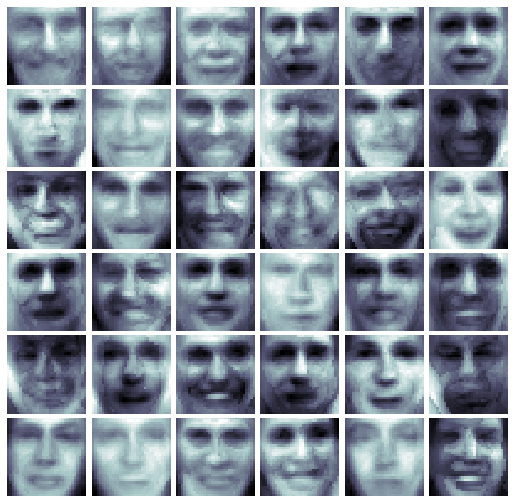

Reconstructed Images with 50 MFs


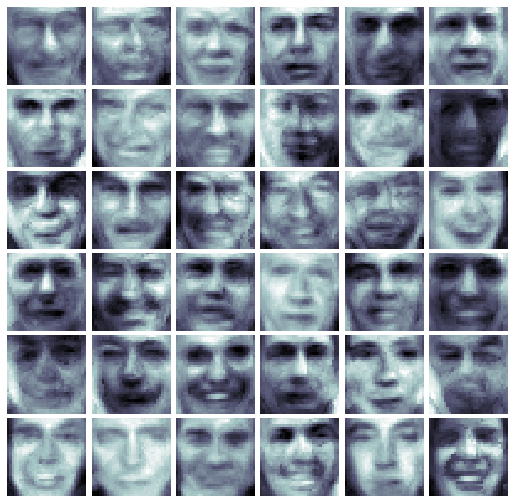

In [20]:
print('Reconstructed Images with 10 MFs')
plt.figure(figsize=(9,9))
for i in range(1,37):
    plt.subplot(6,6,i)
    plt.imshow(faces_nmf10[i-1].reshape((32,32)).T, cmap='bone')
    plt.axis('off')
plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.show()
print('Reconstructed Images with 25 MFs')
plt.figure(figsize=(9,9))
for i in range(1,37):
    plt.subplot(6,6,i)
    plt.imshow(faces_nmf25[i-1].reshape((32,32)).T, cmap='bone')
    plt.axis('off')
plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.show()
print('Reconstructed Images with 50 MFs')
plt.figure(figsize=(9,9))
for i in range(1,37):
    plt.subplot(6,6,i)
    plt.imshow(faces_nmf50[i-1].reshape((32,32)).T, cmap='bone')
    plt.axis('off')
plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.show()

In [21]:
mse_10 = np.mean((faces.T- faces_nmf10)**2)
std_10 = np.std(np.mean((faces.T - faces_nmf10)**2, axis=1))
print('Reconstruction MSE Loss with %d MFs:\nMean: %f\nStd: %f ' % (10, mse_10, std_10))
mse_25 = np.mean((faces.T- faces_nmf25)**2)
std_25 = np.std(np.mean((faces.T - faces_nmf25)**2, axis=1))
print('Reconstruction MSE Loss with %d MFs:\nMean: %f\nStd: %f ' % (25, mse_25, std_25))
mse_50 = np.mean((faces.T- faces_nmf50)**2)
std_50 = np.std(np.mean((faces.T - faces_nmf50)**2, axis=1))
print('Reconstruction MSE Loss with %d MFs:\nMean: %f\nStd: %f ' % (50, mse_50, std_50))

Reconstruction MSE Loss with 10 PCs:
Mean: 711.188410
Std: 373.313254 
Reconstruction MSE Loss with 25 PCs:
Mean: 547.367230
Std: 275.441519 
Reconstruction MSE Loss with 50 PCs:
Mean: 416.027792
Std: 200.738901 
